# UKHSA Mortality Data Visualisation

## 1. Importing the required modules & libraries

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import geopandas as gpd
import gc
from PIL import Image as img
import glob
from IPython.display import Image
import plotly.graph_objects as go
from datetime import datetime
import folium


## 2. Loading the necessary files
### I first review the dataframes to remind myself of the structure

In [2]:
covid_deaths_df = pd.read_csv("1_data_cleaning_preprocessing/2_cleaned_files/ukhsa_mortality_data/uk_regional_covid_mortality_cleaned.csv")

In [3]:
covid_deaths_df

,geography,geography_code,year,month,epiweek,date,metric_value
0,East Midlands,E12000004,2020,1,5,2020-01-30,0.0
1,East Midlands,E12000004,2020,1,5,2020-01-31,0.0
2,East Midlands,E12000004,2020,2,5,2020-02-01,0.0
3,East Midlands,E12000004,2020,2,5,2020-02-02,0.0
4,East Midlands,E12000004,2020,2,6,2020-02-03,0.0
...,...,...,...,...,...,...,...
12991,Yorkshire and The Humber,E12000003,2024,1,2,2024-01-08,1.0
12992,Yorkshire and The Humber,E12000003,2024,1,2,2024-01-09,2.0
12993,Yorkshire and The Humber,E12000003,2024,1,2,2024-01-10,1.0
12994,Yorkshire and The Humber,E12000003,2024,1,2,2024-01-11,0.0


In [4]:
covid_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12996 entries, 0 to 12995
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   geography       12996 non-null  object 
 1   geography_code  12996 non-null  object 
 2   year            12996 non-null  int64  
 3   month           12996 non-null  int64  
 4   epiweek         12996 non-null  int64  
 5   date            12996 non-null  object 
 6   metric_value    12996 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 710.8+ KB


In [5]:
covid_deaths_df['date'] = pd.to_datetime(covid_deaths_df['date'])


In [6]:
covid_deaths_df.set_index('date', inplace=True)

In [7]:
pivoted_df = pd.read_csv("1_data_cleaning_preprocessing/2_cleaned_files/ukhsa_mortality_data/uk_regional_covid_mortality_pivoted_cleaned.csv")

In [8]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1444 non-null   object 
 1   East Midlands             1444 non-null   float64
 2   East of England           1444 non-null   float64
 3   London                    1444 non-null   float64
 4   North East                1444 non-null   float64
 5   North West                1444 non-null   float64
 6   South East                1444 non-null   float64
 7   South West                1444 non-null   float64
 8   West Midlands             1444 non-null   float64
 9   Yorkshire and The Humber  1444 non-null   float64
dtypes: float64(9), object(1)
memory usage: 112.9+ KB


In [9]:
pivoted_df['date'] = pd.to_datetime(pivoted_df['date'])

In [10]:
pivoted_df.set_index('date', inplace=True)

In [11]:
cumulative_df = pd.read_csv("1_data_cleaning_preprocessing/2_cleaned_files/ukhsa_mortality_data/uk_regional_cumulative_mortality_cleaned.csv")

In [12]:
cumulative_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1444 non-null   object 
 1   East Midlands             1444 non-null   float64
 2   East of England           1444 non-null   float64
 3   London                    1444 non-null   float64
 4   North East                1444 non-null   float64
 5   North West                1444 non-null   float64
 6   South East                1444 non-null   float64
 7   South West                1444 non-null   float64
 8   West Midlands             1444 non-null   float64
 9   Yorkshire and The Humber  1444 non-null   float64
dtypes: float64(9), object(1)
memory usage: 112.9+ KB


In [13]:
cumulative_df

,date,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
0,2020-01-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2020-01-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2020-02-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2020-02-02,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2020-02-03,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1439,2024-01-08,18326.0,22924.0,26750.0,10917.0,30504.0,31063.0,14756.0,23410.0,20286.0
1440,2024-01-09,18326.0,22927.0,26755.0,10918.0,30506.0,31063.0,14758.0,23412.0,20288.0
1441,2024-01-10,18326.0,22927.0,26756.0,10918.0,30507.0,31063.0,14758.0,23415.0,20289.0
1442,2024-01-11,18326.0,22927.0,26757.0,10918.0,30507.0,31064.0,14758.0,23415.0,20289.0


In [14]:
cumulative_df['date'] = pd.to_datetime(cumulative_df['date'])

In [15]:
cumulative_df.set_index('date', inplace=True)

## 3. Time Series Mortality Over Time: All Regions
### I first want to produce a graph which displays the mortality over time to see what all the data looks like combined.

### As you can see many of the regions are overlay on the graph, it is not overtly clear which regions had more cases than others. What strikes me about this visualisation is that the peaks for the regions certainly do correlate with one another. I would therefore like to keep this visualisation to highlight this point.

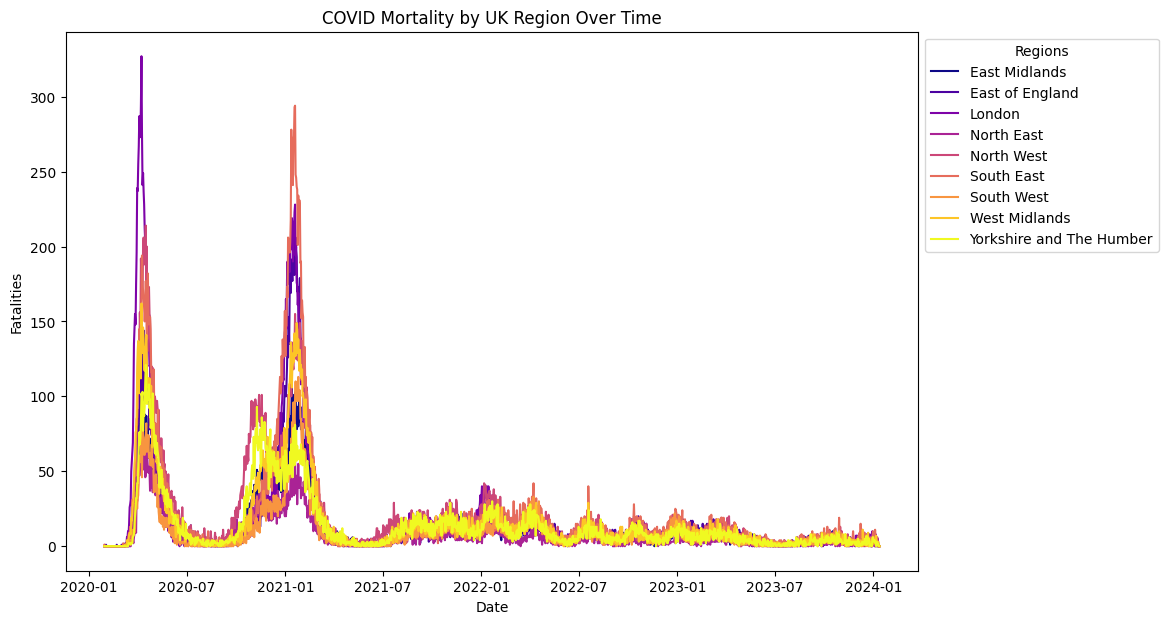

In [16]:
num_regions = len(pivoted_df.columns)

colours = cm.plasma(np.linspace(0, 1, num_regions))

plt.figure(figsize=(11, 7))

for i, column in enumerate(pivoted_df.columns):
    plt.plot(pd.to_datetime(pivoted_df.index, format='%Y-%m-%d', errors='coerce'), pivoted_df[column], color=colours[i], label=column)

plt.title('COVID Mortality by UK Region Over Time')
plt.xlabel('Date')
plt.ylabel('Fatalities')

plt.legend(title='Regions', loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('3_final_figures/regional_mortality_time_series._uk.png', format='png')

plt.show()

### I therefore opted to print a time series for each region. I used the sharey property to ensure that the axes are on the same scale. As you can see London and the South East appeared to have the highest raw fatality figures for a given day, however it is difficult to assess this cumulatively, I will address this at a later stage. 

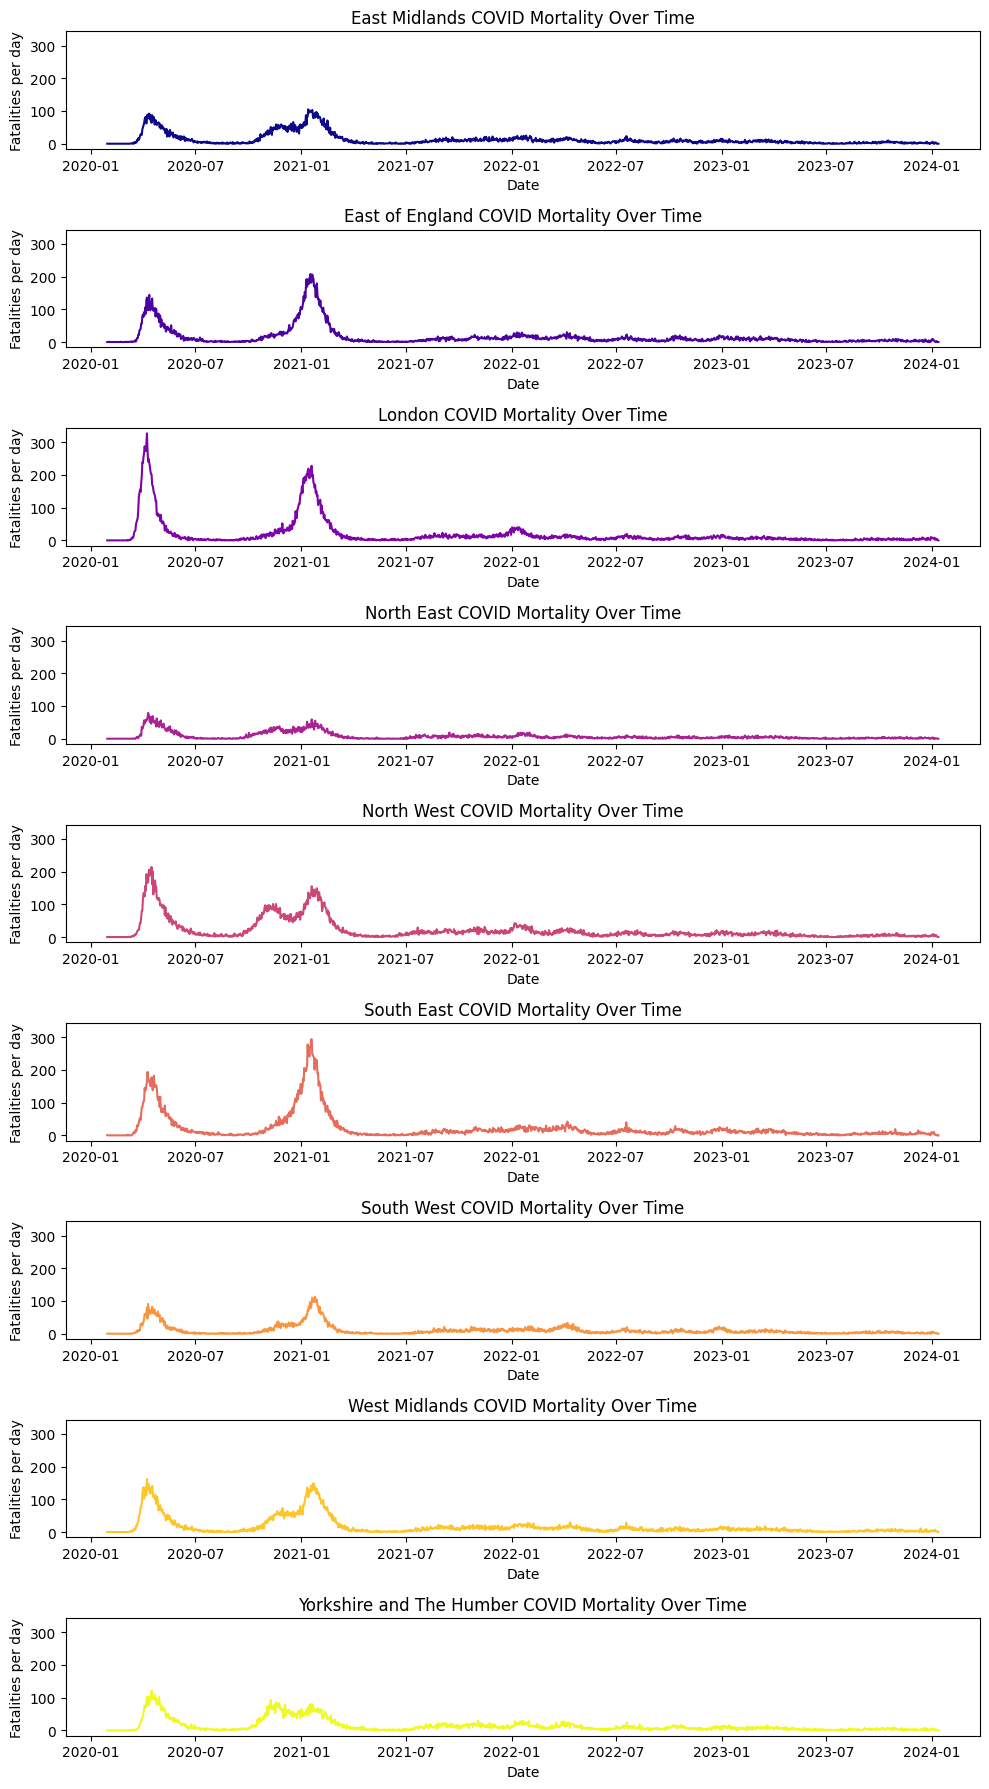

In [17]:
num_regions = len(pivoted_df.columns)

colours = cm.plasma(np.linspace(0, 1, num_regions))

fig, axes = plt.subplots(nrows=num_regions, ncols=1, figsize=(10, 18), sharey=True)

for i, (region, ax) in enumerate(zip(pivoted_df.columns, axes)):
    ax.plot(pd.to_datetime(pivoted_df.index, format='%Y-%m-%d', errors='coerce'), pivoted_df[region], color=colours[i], label=region)
    ax.set_title(f'{region} COVID Mortality Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Fatalities per day')

plt.tight_layout()

plt.savefig('3_final_figures/regional_mortality_subplots_time_series.png', format='png')

plt.show()

### To take the visualisation up to the next level I experimented with the graph objects module of the plotly library to produce an interactive graph for the time series, allowing you to see all regional data with a scrollable axis and the opportunity to turn regions on/off for comparison

In order to do this I:
1. Determined the number of regions to plot from the length of the pivoted dataframe
2. I created an array of colours from the colourmap module of matplotlib - I selected plasma after trying various options as it seemed to be the best visual for me. I used the linspace method of numpy to generate an evenly spaced array of values between 0 and 1 (as colours within a colourmap are stored between these values)
3. I then plotted a graph object figure with the go.Figure() method
4. The colours in the matplotlib colourmap is in the range 0 to 1 whereas the plotly colourmap requires the range of 0 to 255 for each of the colours is multiplied by 255 to ensure the colour is preserved
5. I iterated over the columns in the pivoted dataframe (i.e. the regions) and added a line to the figure using the go.Scatter() method 
6. I set the x-axis to the index, converting it to a datetime, I then set the mode to a line graph (opposed to markers/lines+markers) as this gave the best result. I also set the name of the scatter (for the legend) to the name of the column (region) and finally the colour is set by assigning the colour of the line (converted previously) to the color (and converting to a dictionary)
7. When I first plot the graph it was too zoomed out so I therefore set a range of dates I wanted to start and end on - the graph would be this zoomed in when it is generated, after manipulating the parameters I felt that a period of 8 months gave sufficient visual detail
8. I then used the update_layout method in order to set the title of the chart/axes/legend. I also set the template to plotly_white as I found the black background (my default) a challenge to read from with this colour theme. I then set the desired height and width of the plot. 
9. In order to make the plot scrollable along the x-axis I create a dictionary of values - the rangeslider configuration adds the sliding graph at the bottom which to make your selection, I set the opening range to the start and end range I already declared
10. Finally, I display the plot - enjoy!

In [18]:
### number_regions = len(pivoted_df.columns)
colours = cm.plasma(np.linspace(0, 1, num_regions))

fig = go.Figure()

for i, column in enumerate(pivoted_df.columns):
    colour = f'rgba({int(colours[i][0] * 255)}, {int(colours[i][1] * 255)}, {int(colours[i][2] * 255)}, {colours[i][3]})'
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(pivoted_df.index, format='%Y-%m-%d', errors='coerce'),
        y=pivoted_df[column],
        mode='lines',
        name=column,
        line=dict(color=colour)
    ))

x_range_start = pd.to_datetime(pivoted_df.index[0], format='%Y-%m-%d')
x_range_end = pd.to_datetime(pivoted_df.index[240], format='%Y-%m-%d')

fig.update_layout(
    title='COVID Mortality by UK Region Over Time',
    xaxis_title='Date',
    yaxis_title='Number of Fatalities per Day',
    legend_title='Regions',
    
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date',
        range=[x_range_start, x_range_end],
    ),
    height=800,
    width=1000
)

plt.savefig('3_final_figures/interactive_time_series_regional.png', format='png')

plt.show()

<Figure size 640x480 with 0 Axes>

### As I highlighted although, it appears that London had the highest mortality for any given day, this is not necessarily a reflection of the overall mortality. I therefore opted to plot a cumulative graph for all regions over time. This allows us to see the changes in trends for each region over time.

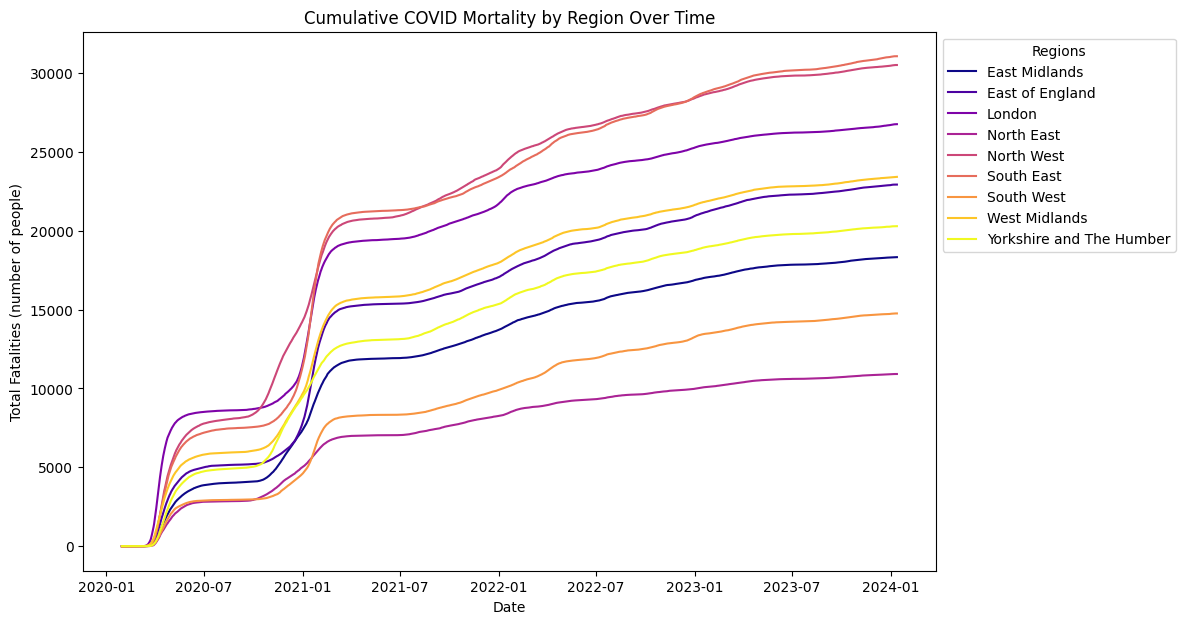

In [19]:
num_regions = len(cumulative_df.columns)

colors = cm.plasma(np.linspace(0, 1, num_regions))

plt.figure(figsize=(11, 7))

for i, column in enumerate(cumulative_df.columns):
    plt.plot(pd.to_datetime(cumulative_df.index, format='%Y-%m-%d', errors='coerce'), cumulative_df[column], color=colors[i], label=column)
pd.to_datetime(cumulative_df.index, format='%Y-%m-%d', errors='coerce')
plt.title('Cumulative COVID Mortality by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Fatalities (number of people)')

plt.legend(title='Regions', loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('3_final_figures/regional_cumulative_covid_mortality_time_series.png', format='png')

plt.show()

### Finally  plot a bar chart of the total fatalities, as you can se surprisingly the North West and South East had the highest fatalities

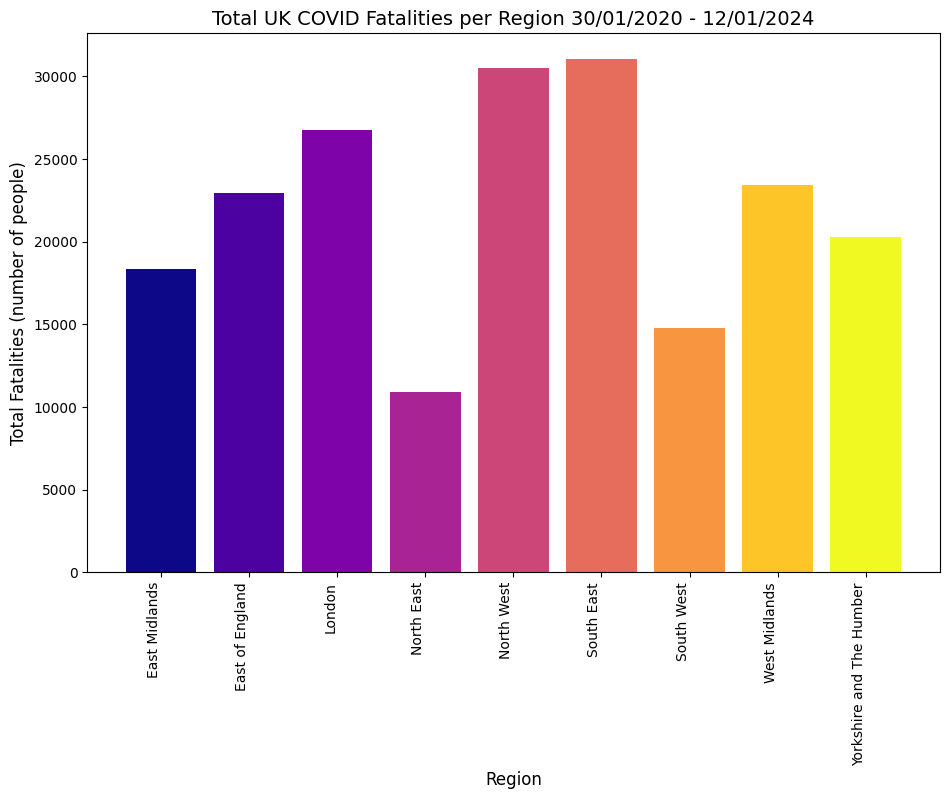

In [20]:
total_fatalities = pivoted_df.sum(axis=0)

start_date = pivoted_df.index[0].strftime("%d/%m/%Y")
end_date = pivoted_df.index[-1].strftime("%d/%m/%Y")

num_regions = len(pivoted_df.columns)
colours = cm.plasma(np.linspace(0, 1, num_regions))

plt.figure(figsize=(11, 7))
plt.bar(total_fatalities.index, total_fatalities.values, color=colours)

plt.title(f'Total UK COVID Fatalities per Region {start_date} - {end_date}', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Fatalities (number of people)', fontsize=12)

plt.xticks(rotation=90, ha='right')

plt.savefig('3_final_figures/regional_total_fatalities_bar_chart.png', format='png')

plt.show()


## It would be useful to represent time series data on a map so that you can visually see the 

### In order to plot the data geographically I need to first read the shape file using the geopandas library. I found the necessary region shapefiles on the [Geoportal Statistics website](https://geoportal.statistics.gov.uk/datasets/cca6931ac5e54dcfba12ebbee4d9ae60_0/explore?location=52.083344%2C0.353373%2C5.73)

In [21]:
# shapefile_path = '2_shape_files/Regions Dec 2020 EN BUC (1)/RGN_DEC_2020_EN_BUC.shx'

In [22]:
shapefile_path = '2_shape_files/Regions Dec 2020 EN BUC (1)/RGN_DEC_2020_EN_BUC.shp'

In [23]:
gdf = gpd.read_file(shapefile_path)

In [24]:
gdf

,RGN20CD,RGN20NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E12000001,North East,417314,600356,-1.728880,55.2970,a9a7f5ce-c85f-4fa2-8ea9-fc22d5ee4db5,"MULTIPOLYGON (((414008.8 641602.7, 412526.301 ..."
1,E12000002,North West,350014,506279,-2.772390,54.4494,3d56f576-e796-482e-b705-a0027eb0b4c4,"MULTIPOLYGON (((323289.501 461869.6, 320892.4 ..."
2,E12000003,Yorkshire and The Humber,446902,448736,-1.287140,53.9326,d61afce3-a645-495b-94a2-ac8848e95dcb,"MULTIPOLYGON (((496810.4 421526.1, 495485.8 42..."
3,E12000004,East Midlands,477659,322635,-0.849690,52.7957,b47b6c05-639c-4def-9e82-a93924360e21,"POLYGON ((516022.702 412210.895, 515854.099 41..."
4,E12000005,West Midlands,386294,295477,-2.203580,52.5570,cf939565-315a-43e4-a87b-61d239850aee,"POLYGON ((409402.997 365710.796, 412633.099 36..."
5,E12000006,East of England,571078,263235,0.504207,52.2407,d98e954e-7b5f-423b-b59f-2a7ed9f4c35e,"MULTIPOLYGON (((580122.503 345595.104, 580233...."
6,E12000007,London,517515,178392,-0.308660,51.4923,8fb01971-e68d-4402-861b-3e4773a16d29,"POLYGON ((537543.796 199883.103, 537625.101 19..."
7,E12000008,South East,470062,172924,-0.993110,51.4510,733d32ba-8776-4306-a5b3-8b259f34e2a4,"MULTIPOLYGON (((587003.9 171796.8, 585063.9 17..."
8,E12000009,South West,285013,102567,-3.633460,50.8112,120aab4b-449a-4108-b2f3-a20684e05bdd,"MULTIPOLYGON (((213329.104 143304.599, 212711...."


### As you can see the column from the geo-dataframe RGN20NM corresponds to the column names in my processed dataframe. My dataframe is not the same orientation so, I first transpose it prior to the merge:

In [41]:
cumulative_df_transposed = cumulative_df.transpose()

merged_df = gdf.set_index('RGN20NM').join(cumulative_df_transposed)

merged_df.columns = [
    str(col.date()) if isinstance(col, pd.Timestamp) else col
    for col in merged_df.columns
]

### I can now plot the time series of the data in geographical form

### I use the date_range function of pandas to obtain an array of date ranges for me to iterate over

In [43]:
start_date = "2020-01-30"
end_date = "2024-01-12"

date_array = pd.date_range(start=start_date, end=end_date)

date_list = date_array.tolist()

date_array

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06',
               '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12'],
              dtype='datetime64[ns]', length=1444, freq='D')

### I inspect the merge to ensure that the data has correctly been processed:

In [45]:
merged_df

,RGN20CD,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,2020-01-30,2020-01-31,2020-02-01,...,2024-01-03,2024-01-04,2024-01-05,2024-01-06,2024-01-07,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12
RGN20NM,,,,,,,,,,,,,,,,,,,,,
North East,E12000001,417314,600356,-1.728880,55.2970,a9a7f5ce-c85f-4fa2-8ea9-fc22d5ee4db5,"MULTIPOLYGON (((414008.8 641602.7, 412526.301 ...",0.0,0.0,0.0,...,10913.0,10915.0,10915.0,10916.0,10916.0,10917.0,10918.0,10918.0,10918.0,10918.0
North West,E12000002,350014,506279,-2.772390,54.4494,3d56f576-e796-482e-b705-a0027eb0b4c4,"MULTIPOLYGON (((323289.501 461869.6, 320892.4 ...",0.0,0.0,0.0,...,30482.0,30486.0,30488.0,30494.0,30498.0,30504.0,30506.0,30507.0,30507.0,30507.0
Yorkshire and The Humber,E12000003,446902,448736,-1.287140,53.9326,d61afce3-a645-495b-94a2-ac8848e95dcb,"MULTIPOLYGON (((496810.4 421526.1, 495485.8 42...",0.0,0.0,0.0,...,20278.0,20281.0,20282.0,20282.0,20285.0,20286.0,20288.0,20289.0,20289.0,20289.0
East Midlands,E12000004,477659,322635,-0.849690,52.7957,b47b6c05-639c-4def-9e82-a93924360e21,"POLYGON ((516022.702 412210.895, 515854.099 41...",0.0,0.0,0.0,...,18317.0,18317.0,18317.0,18321.0,18323.0,18326.0,18326.0,18326.0,18326.0,18326.0
West Midlands,E12000005,386294,295477,-2.203580,52.5570,cf939565-315a-43e4-a87b-61d239850aee,"POLYGON ((409402.997 365710.796, 412633.099 36...",0.0,0.0,0.0,...,23392.0,23394.0,23398.0,23405.0,23408.0,23410.0,23412.0,23415.0,23415.0,23415.0
East of England,E12000006,571078,263235,0.504207,52.2407,d98e954e-7b5f-423b-b59f-2a7ed9f4c35e,"MULTIPOLYGON (((580122.503 345595.104, 580233....",0.0,0.0,0.0,...,22914.0,22919.0,22922.0,22924.0,22924.0,22924.0,22927.0,22927.0,22927.0,22927.0
London,E12000007,517515,178392,-0.308660,51.4923,8fb01971-e68d-4402-861b-3e4773a16d29,"POLYGON ((537543.796 199883.103, 537625.101 19...",0.0,0.0,0.0,...,26727.0,26732.0,26740.0,26742.0,26747.0,26750.0,26755.0,26756.0,26757.0,26757.0
South East,E12000008,470062,172924,-0.993110,51.4510,733d32ba-8776-4306-a5b3-8b259f34e2a4,"MULTIPOLYGON (((587003.9 171796.8, 585063.9 17...",1.0,1.0,1.0,...,31041.0,31052.0,31057.0,31059.0,31061.0,31063.0,31063.0,31063.0,31064.0,31064.0
South West,E12000009,285013,102567,-3.633460,50.8112,120aab4b-449a-4108-b2f3-a20684e05bdd,"MULTIPOLYGON (((213329.104 143304.599, 212711....",0.0,0.0,0.0,...,14743.0,14746.0,14749.0,14751.0,14753.0,14756.0,14758.0,14758.0,14758.0,14758.0


### I iterate over all the dates and produce plots for the data saving the output to a file, these files will then be combined to form the final plot

In [47]:
selected_column = merged_df['2020-01-30']

In [48]:
output_folder_path = '3_final_figures/regional_geography_gif'

KeyboardInterrupt: 

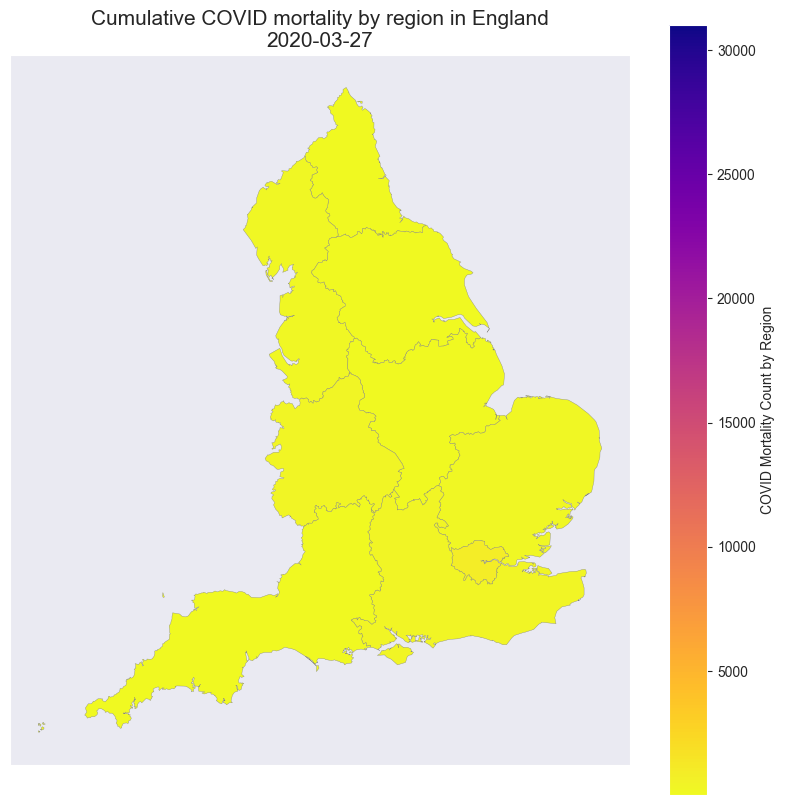

In [53]:
for i, date in enumerate(date_array):
    date_str = date_array[i].strftime('%Y-%m-%d')

    file_date = date_array[i].strftime('%d-%m-%Y')
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    map_plot = merged_df.plot(
        ax=ax, 
        column=date_str, 
        cmap='plasma_r', 
        linewidth=0.25, 
        edgecolor='0.5', 
        vmin=10, 
        vmax=31000, 
        legend=True, 
        norm=plt.Normalize(vmin=10, vmax=31000),
        legend_kwds={'label': "COVID Mortality Count by Region"}
    )
    
    ax.set_xticks([])
    ax.set_yticks([])

    map_plot.set_title(
        'Cumulative COVID mortality by region in England\n' + date_str, 
        fontdict={'fontsize': 15, 'fontweight': '3'}
    )
    
    filepath = os.path.join(output_folder_path, file_date.replace('-', '_') + '_covid_mortality.png')
    
    map_fig = plt.gcf()
    map_fig.savefig(filepath, dpi = 100)

    plt.close('all')

    map_fig.clf()
    gc.collect()

### I now iterate over all the frames of the plots to produce a gif illustrating the mortality over time for each region of england

In [ ]:
frames = []

images = glob.glob(output_folder_path + '/*.png')

def extract_date_from_filename(filename):
    date_string = filename.split('/')[-1][:10]
    return datetime.strptime(date_string, "%d_%m_%Y")

sorted_images = sorted(images, key=extract_date_from_filename)

for image_path in sorted_images:
    image_frame = img.open(image_path)
    frames.append(image_frame)

In [ ]:
frames[0].save(output_folder_path + '/CovidRegionalMortality.gif', format='GIF', append_images = frames[1:], save_all = True, duration = 0.5, loop=0)

### Displaying GIF with ipython display Image module

In [ ]:
gif_path = output_folder_path + '/CovidRegionalMortality.gif'

Image(filename=gif_path)

## Conclusions drawn from dataset

### - Two clear waves of mortality between March-June 2020 & December-March 2021 - this was similar for all regions
### - The North West & South West regions had the highest mortality followed by London and the East of England - this is a surprise as London is the most densely populated area 
### - London had the highest mortality for any one day with 327 people sadly passing away on April 8th 2020

## Further areas to consider:
### - Reviewing population data, accounting for population density
### - Comparing to COVID-19 cases & vaccination data
### - See whether there is a temporal correlation between this data and misinformation peaks, mental health and school performance